# 四、神经网络八股拓展

①自制数据集，解决本领域应用

②数据增强，扩充数据集

③断点续训，存取模型

④参数提取，把参数存入文本

⑤acc/loss可视化，查看训练效果

⑥应用程序，给图识物

本章节在此代码中进行拓展

In [67]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2632 - sparse_categorical_accuracy: 0.9246 - val_loss: 0.1454 - val_sparse_categorical_accuracy: 0.9572
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9668 - val_loss: 0.0990 - val_sparse_categorical_accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0776 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0822 - val_sparse_categorical_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0567 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0723 - val_sparse_categorical_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0749 - val_sparse_categorical_accuracy: 0.9778
Model: "sequential_13"
_________________________________________________________________
Layer 

## 自制数据集

定义一个`def generateds(图片路径，标签文件)`函数获取自定义数据集。

In [68]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os

train_path = './data/mnist_image_label/mnist_train_jpg_60000/'
train_txt = './data/mnist_image_label/mnist_train_jpg_60000.txt'
x_train_savepath = './data/mnist_image_label/mnist_x_train.npy'
y_train_savepath = './data/mnist_image_label/mnist_y_train.npy'

test_path = './data/mnist_image_label/mnist_test_jpg_10000/'
test_txt = './data/mnist_image_label/mnist_test_jpg_10000.txt'
x_test_savepath = './data/mnist_image_label/mnist_x_test.npy'
y_test_savepath = './data/mnist_image_label/mnist_y_test.npy'


def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_
        print('loading : ' + content)  # 打印状态提示

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_


# 判断数据集是否存在，存在直接调用，不存在时调用generateds制作数据集
if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 28, 28))
    x_test = np.reshape(x_test_save, (len(x_test_save), 28, 28))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

-------------Load Datasets-----------------
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2628 - sparse_categorical_accuracy: 0.9244 - val_loss: 0.1404 - val_sparse_categorical_accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.0979 - val_sparse_categorical_accuracy: 0.9709
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.0974 - val_sparse_categorical_accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0593 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0774 - val_sparse_categorical_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9766
Model: "sequential_14"
____________________________

## 数据增强

对图像的增强就是对图像进行简单形变，解决因为拍照角度不同等因素造成的影响。

tensorflow2中的数据增强函数

```python
image_gen._train = tf.keras.preprocessing.image.lmageDataGenerator(
	rescale =所有数据将乘以该数值
	rotation_ range =随机旋转角度数范围
	width_ shift range =随机宽度偏移量
	height shift range =随机高度偏移量
	水平翻转: horizontal_flip =是否随机水平翻转	
	随机缩放: zoom_range =随机缩放的范围[1-n, 1+n] )

image_gen_train.fit(x_train)
```
例如

```
image_gen_train = ImageDataGenerator(
	rescale=1. / 1.，# 如为图像，分母为255时，可归至0 ~ 1
	rotation_ range=45, #随机45度旋转
	width_ shift_ range=.15, #宽度偏移
	height_ shift_ range= .15, #高度偏移
	horizontal_ flip=False, #水平翻转
	zoom range=0.5 # 将图像随机缩放闵量50%)
)
	
image_gen_train.fit(x_train)


image_gen_train.fit(x_train)  # x_train需要四维数据
# 变为
x_train = x_train.reshape(x_train. shape[0], 28，28，1)
# 即将60000张28行28列的数据---变为--->60000张28行28列单通道数据，最后的1代表灰度值

#model.fit也需要做出调整
model.fit(x_train, y_train,batch size=32,...)
# 变为
model.fit(image_gen_train.flow(x_train, y_train,batch_size=32),...)
```

代码示例

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度,从(60000, 28, 28)reshape为(60000, 28, 28, 1)

image_gen_train = ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=False,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
image_gen_train.fit(x_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(image_gen_train.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test),validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 1.4107 - sparse_categorical_accuracy: 0.5403 - val_loss: 0.4981 - val_sparse_categorical_accuracy: 0.8707
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.9528 - sparse_categorical_accuracy: 0.7099 - val_loss: 0.3629 - val_sparse_categorical_accuracy: 0.8945
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.8155 - sparse_categorical_accuracy: 0.7542 - val_loss: 0.2796 - val_sparse_categorical_accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7554 - sparse_categorical_accuracy: 0.7717 - val_loss: 0.2776 - val_sparse_categorical_accuracy: 0.9185
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.7169 - sparse_categorical_accuracy: 0.7853 - val_loss: 0.2416 - val_sparse_categorical_accuracy: 0.9296
Model: "sequential_15"
_________________________________________________________________
L

## 断点续训

**读取模型**

1. 定义存放模型的路径和文件名，命名为ckpt文件
2. 生成ckpt文件时会同步生成index索引表，所以判断索引表是否存在，来判断是否存在模型参数
3. 如有索引表，则直接读取ckpt文件中的模型参数

```python
load_weights(路径文件名)

checkpoint_save_ path ="./checkpoint/mnist.ckpt"
if os.path.exists (checkpoint_save_path +'.index') :
	print ( -------------load the mode1------- --- ------- ' )
	model.load_weights(checkpoint_save_path)
```

**保存模型**
``` python
cp_callback = tf.keras.callbacks.ModelCheckpoint(
	filepath=路径文件名，
	save_weights_only= True/False,  # 是否只保留模型参数
	save_best_only=True/False)  # 是否只保留最优结果

history = model.fit ( callbacks=[cp_callback] )
```

代码示例


In [70]:
import tensorflow as tf
import os

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,callbacks=[cp_callback])
model.summary()

-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0172 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.0785 - val_sparse_categorical_accuracy: 0.9771
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0136 - sparse_categorical_accuracy: 0.9959 - val_loss: 0.0903 - val_sparse_categorical_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0126 - sparse_categorical_accuracy: 0.9959 - val_loss: 0.0906 - val_sparse_categorical_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0103 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0895 - val_sparse_categorical_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0095 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.0954 - val_sparse_categorical_accuracy: 0.9786
Model: "sequential_16"
___________________________

In [42]:
# history 记录的数据，方便可视化
history.history

{'loss': [0.25869882106781006,
  0.11432398110628128,
  0.08000423014163971,
  0.05934194475412369,
  0.04676065593957901],
 'sparse_categorical_accuracy': [0.9245833158493042,
  0.9664166569709778,
  0.9752333164215088,
  0.9815999865531921,
  0.9855999946594238],
 'val_loss': [0.1378164440393448,
  0.10152515023946762,
  0.09505995362997055,
  0.08332907408475876,
  0.07398554682731628],
 'val_sparse_categorical_accuracy': [0.9580000042915344,
  0.9686999917030334,
  0.9707000255584717,
  0.9753999710083008,
  0.9765999913215637]}

In [71]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

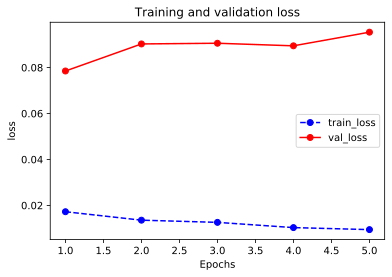

In [72]:
plot_metric(history,"loss")

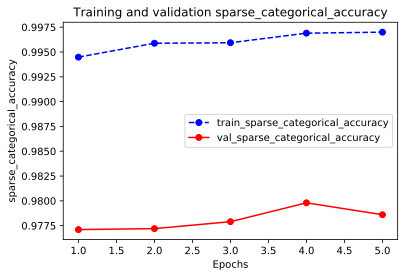

In [74]:
plot_metric(history,"sparse_categorical_accuracy")

## 参数提取

`model.trainable_variables`：返回模型中可训练的参数

设置print输出格式
```python
np.set printoptions(threshold=超过多少省略显示)

np . set_printoptions(threshold=np.inf) # np. inf表示无限大
```

代码示例：

In [75]:
import tensorflow as tf
import os
import numpy as np
np.set_printoptions(threshold=np.inf)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,callbacks=[cp_callback])
model.summary()
print(model.trainable_variables)
print("====="*10)
file = open('./weights/weights_mnist.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0137 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0899 - val_sparse_categorical_accuracy: 0.9770
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9965 - val_loss: 0.0930 - val_sparse_categorical_accuracy: 0.9771
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0105 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0923 - val_sparse_categorical_accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0094 - sparse_categorical_accuracy: 0.9972 - val_loss: 0.0992 - val_sparse_categorical_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0082 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9774
Model: "sequential_17"
___________________________

## acc/loss可视化

```python
history=model.fit(训练集数据，训练集标签，batch_size=, epochs=,
                  validation_split=用作测试数据的比例,validation_ data=测试集，validation_freq=测试频率)
```


history:

- 训练集loss: loss
- 测试集loss: val_loss
- 训练集准确率: sparse_categorical_accuracy
- 测试集准确率: val_sparse_categorical_accuracy

``` python
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_ sparse_categorical_accuracy']
loos = history.history['loss']
val_loss = history.history['val_loss']
```

❗知识补充，关于plt.subplot(x, y , z)，各个参数也可以用逗号,分隔开也可以写在一起。第一个参数代表子图的行数；第二个参数代表该行图像的列数； 第三个参数代表每行的第几个图像。

``` python
fig.tight_layout() # 调整整体空白 
plt.subplots_adjust(wspace =0, hspace =0)  # 调整子图间距
# 参数
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2   # the amount of height reserved for white space between subplots,
               # expressed as a fraction of the average axis height
```

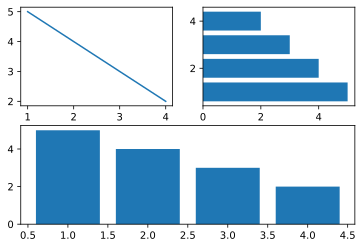

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=[1,2,3,4]
y=[5,4,3,2]

plt.subplot(2,2,1) #呈现2行2列，第一行的第一幅图
plt.plot(x,y)

plt.subplot(2,2,2) #呈现2行2列，第一行的第二幅图
plt.barh(x,y)

plt.subplot(212)  # 第2行的全部
plt.bar(x,y)

plt.show()

**acc/loss可视化代码示例**

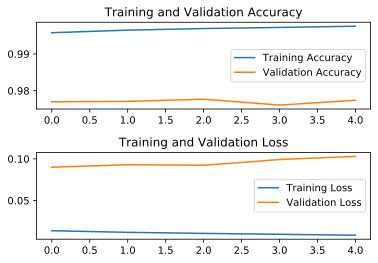

In [77]:

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplots_adjust( hspace =0.5) 

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 应用程序

前向传播执行应用

``` python
#  返回前向传播计算结果
predict(输入特征，batch_size=整数)

# 复现模型,(前向传播)
model = tf.keras.models.Sequential([
	tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128activation='relu'),
	tf.keras.layers.Dense(10，activation='softmax')])

# 加载参数
model.load_weights(model_save_path)

# 预测结果
result = model.predict(x_ predict)
```

❗知识点补充：

np.newaxis：在np.newaxis所在的位置，增加一个维度

In [78]:
# -*- coding: utf-8 -*-
"""
tf.newaxis 和 numpy newaxis
"""
import numpy as np
import tensorflow as tf

feature = np.array([[1, 2, 3],
                    [2, 4, 6]])
center = np.array([[1, 1, 1],
                   [0, 0, 0]])

print("原始数组大小：")
print(feature.shape)
print(center.shape)

np_feature_1 = feature[:, :, np.newaxis]  # 在末尾增加一个维度
np_feature_2 = feature[:, np.newaxis] # 在中间增加一个维度
np_center = center[np.newaxis, :] # 在首部增加一个维度

print("添加 np.newaxis 后数组大小：")
print(np_feature_1.shape)
print(np_feature_1)
print('-----')
print(np_feature_2.shape)
print(np_feature_2)
print('-----')
print(np_center.shape)
print(np_center)

原始数组大小：
(2, 3)
(2, 3)
添加 np.newaxis 后数组大小：
(2, 3, 1)
[[[1]
  [2]
  [3]]

 [[2]
  [4]
  [6]]]
-----
(2, 1, 3)
[[[1 2 3]]

 [[2 4 6]]]
-----
(1, 2, 3)
[[[1 1 1]
  [0 0 0]]]


In [79]:
#在tensorflow中有有tf.newaxis用法相同
"""
tf.newaxis 和 numpy newaxis
"""
import numpy as np
import tensorflow as tf

feature = np.array([[1, 2, 3],
                        [2, 4, 6]])
center = np.array([[1, 1, 1],
                   [0, 0, 0]])

print("原始数组大小：")
print(feature.shape)
print(center.shape)

tf_feature_1 = feature[:, :, tf.newaxis]  # 在末尾增加一个维度
tf_feature_2 = feature[:, tf.newaxis] # 在中间增加一个维度
tf_center = center[tf.newaxis, :] # 在首部增加一个维度

print("添加 np.newaxis 后数组大小：")
print(tf_feature_1.shape)

print('-----')
print(tf_feature_2.shape)

print('-----')
print(tf_center.shape)

原始数组大小：
(2, 3)
(2, 3)
添加 np.newaxis 后数组大小：
(2, 3, 1)
-----
(2, 1, 3)
-----
(1, 2, 3)


image_path ./data/num_image/0.png


pred: [0]


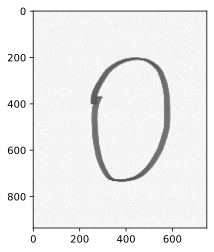

image_path ./data/num_image/1.png


pred: [1]


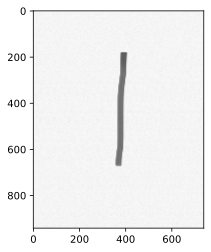

image_path ./data/num_image/2.png


pred: [2]


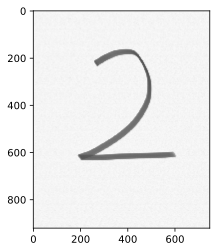

image_path ./data/num_image/3.png


pred: [3]


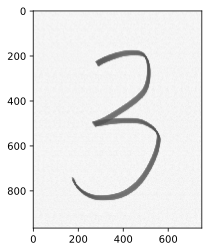

image_path ./data/num_image/4.png


pred: [4]


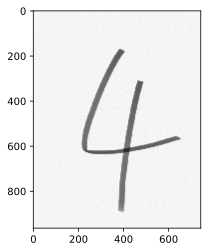

image_path ./data/num_image/5.png


pred: [5]


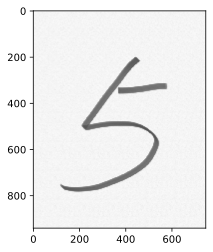

image_path ./data/num_image/6.png


pred: [6]


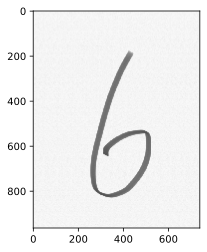

image_path ./data/num_image/7.png


pred: [7]


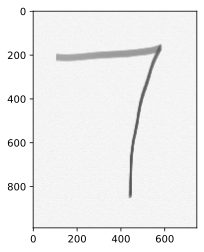

image_path ./data/num_image/8.png


pred: [8]


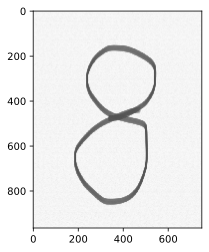

image_path ./data/num_image/9.png


pred: [9]


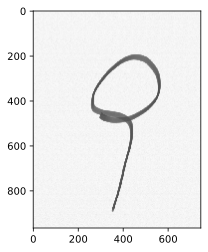

In [80]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model_save_path = './checkpoint/mnist.ckpt'
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.load_weights(model_save_path)
# preNum = int(input("input the number of test pictures:")
preNum = 10
for i in range(preNum):
    image_path = "./data/num_image/"+str(i)+".png"
    print("image_path",image_path)
    img = Image.open(image_path)

    image = plt.imread(image_path)
    plt.set_cmap('gray')
    plt.imshow(image)

    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))

    # 将输入图片变为只有黑色和白色的高对比图片
    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:  # 小于200的变为纯黑色
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0  # 其余变为纯白色
	
	# 由于神经网络训练时都是按照batch输入
    # 为了满足神经网络输入特征的shape(图片总数，宽，高）
    # 所以要将28行28列的数据[28,28]二维数据---变为--->一个28行28列的数据[1,28,28]三维数据
    img_arr = img_arr / 255.0
    x_predict = img_arr[tf.newaxis, ...]  # 插入一个维度
    result = model.predict(x_predict)
    pred = tf.argmax(result, axis=1)

    print('\n')
    tf.print("pred:",pred)

    plt.pause(1)  # 相当于plt.show()，但是只显示1秒
    plt.close()